This notebook is a quick deonstration of the simple linear regression model

In this notebook we read the marketing spend across different advertising channels and try to predict the sales amount

### 0. Import the required libraries and dataset

In [1]:
# Data processing libraires
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine learning libraries (Stats Model)
import statsmodels
import statsmodels.api as sm

# Machine learning libraries (Scikit Learn)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv(r'./data/advertising.csv')
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### 1. Perform EDA on the dataset

<Figure size 1000x1000 with 0 Axes>

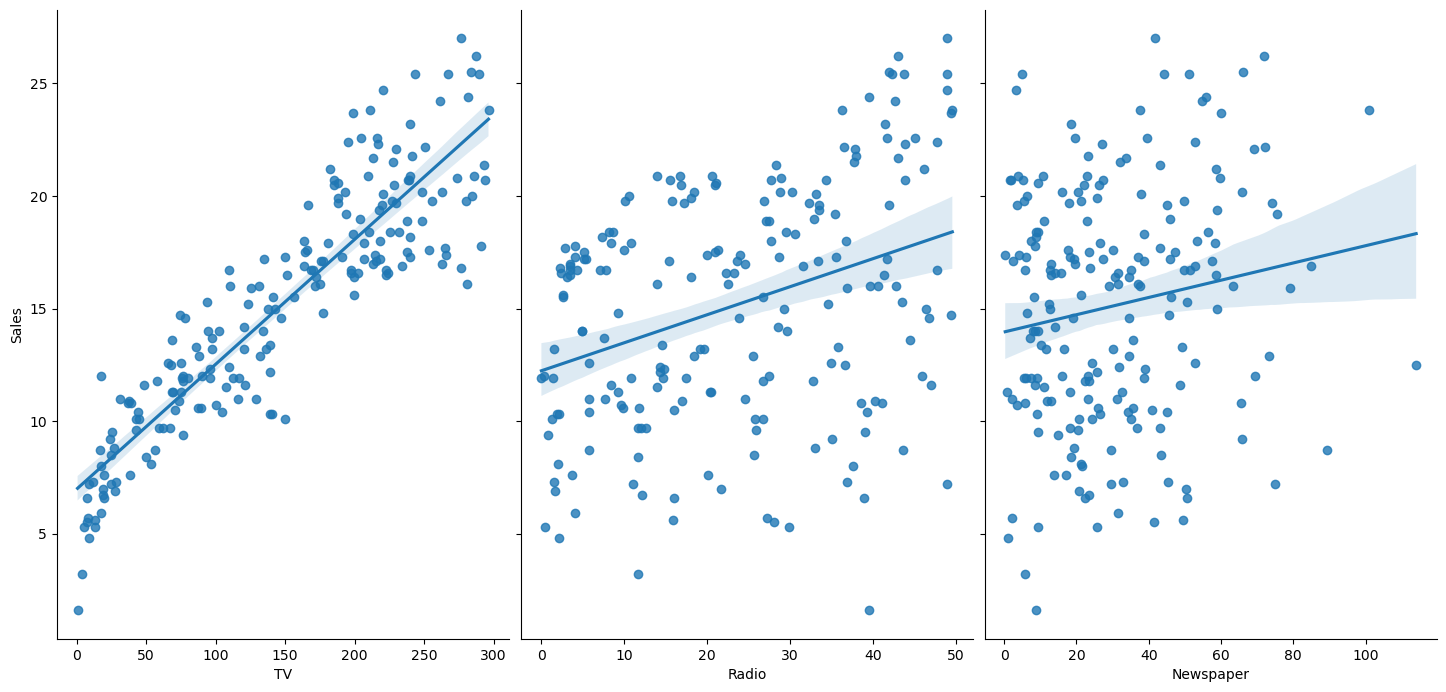

In [4]:
# Visualizing the data
plt.figure(figsize=(10,10))
sns.pairplot(
                data = data, 
                x_vars=['TV', 'Radio', 'Newspaper'], 
                y_vars='Sales', 
                height=7, 
                aspect=0.7, 
                kind='reg'
            )
plt.show()

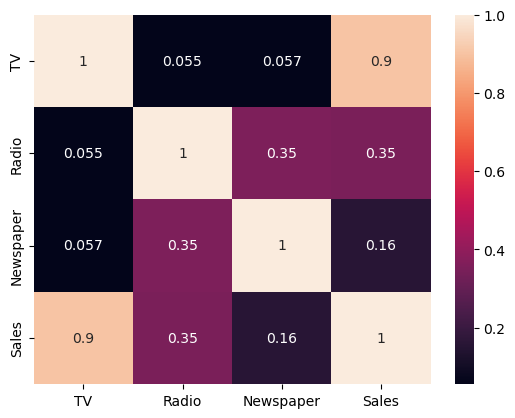

In [5]:
# Understanding the correlation between the variables
sns.heatmap(data.corr(), annot=True)
plt.show()

### 2. Build the regression model

Here we shall use the statsmodel package OLS to build the linear regression model <br> We choose to build the model using statsmodel package since it provides a better summary for the features and other evaluation metrics <br> For building the linear model using OLS we need to perform the below step since OLS does not account for the intercept <br> X_train = sm.add_constant(X_train)

In [6]:
# Splitting the data into training and testing sets
X = data['TV']
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [7]:
X_train = sm.add_constant(X_train)
linear_regression_model = sm.OLS(y_train, X_train).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     666.4
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.14e-56
Time:                        19:21:56   Log-Likelihood:                -340.57
No. Observations:                 150   AIC:                             685.1
Df Residuals:                     148   BIC:                             691.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0082      0.362     19.382      0.0

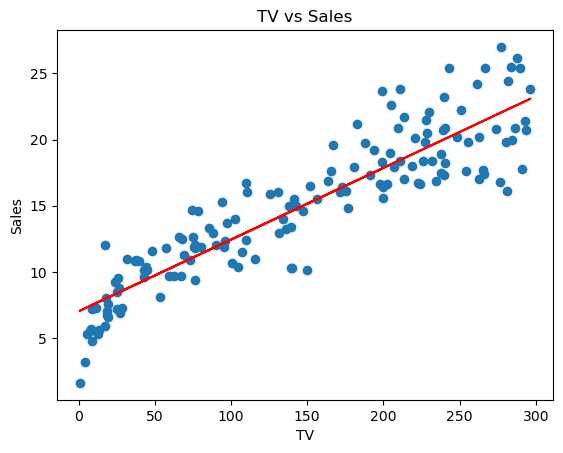

In [8]:
# Visualize the output of the model
y_train_pred = linear_regression_model.predict(X_train)
plt.scatter(X_train['TV'], y_train)
plt.plot(X_train['TV'], y_train_pred, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

### 3. Evaluate the model using residual analysis 
Residual analysis verified if the error (y-y_pred) is a normal distirbution

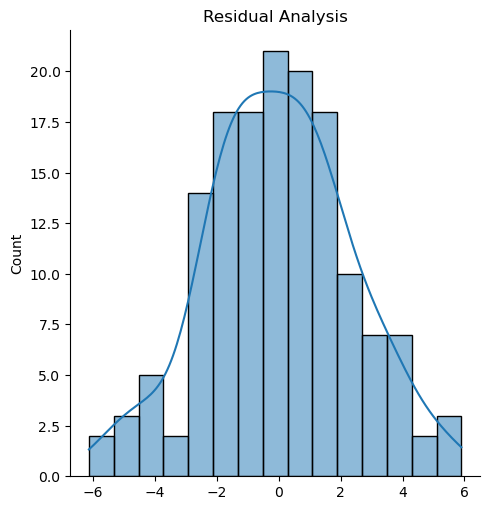

In [11]:
res = y_train - y_train_pred
sns.displot(res, bins=15, kde=True)
plt.title('Residual Analysis')
plt.show()

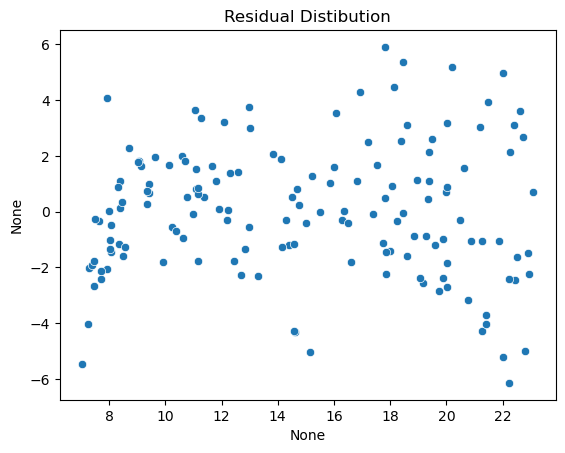

In [10]:
res = y_train - y_train_pred
sns.scatterplot(x=linear_regression_model.predict(X_train), y=res)
plt.title('Residual Distibution')
plt.show()

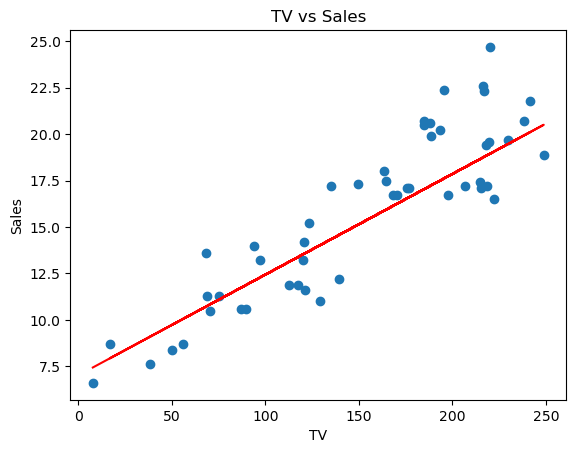

In [12]:
# Predict the values on the test set
y_test_pred = linear_regression_model.predict(sm.add_constant(X_test))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

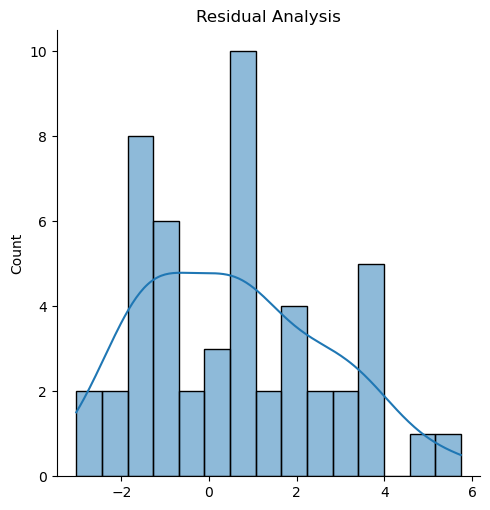

In [13]:
# Verify the residual distribution for the test data
res = y_test - y_test_pred
sns.displot(res, bins=15, kde=True)
plt.title('Residual Analysis')
plt.show()

In [14]:
# Verify the r-square score for the model on the test set
print("r2_score:", r2_score(y_test, y_test_pred))

#Verify the mean squared error for the model on the test set
print("mean_squared_error:", mean_squared_error(y_test, y_test_pred))

r2_score: 0.7723404266389128
mean_squared_error: 4.525508063101037
